# Implement SGD on bston dataset
Dataset from sklearn load_boston

The GD is theta=theta-alpha*derivative(cost function)
equ=y=wtx+b; 
cost = (y-wtx-b)^2 
determinant wrt w=> -2(y-wtx-b)x 
determinant wrt b => -2(y-wtx-b); 
in general : loss*  These are in vec notation

h=np.dot(x,theta);
loss=h-y;
cost=np.sum(loss**2)/(2*m);
gradient=np.dot(xt,loss)/m;
theta=theta-alpha*gradient    

# Objective
Implement the model and compare the intercept and weights with sklearn

# Import data and libraries and split train and test by 80:20

In [139]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()
print(boston.data.shape)
boston.data[0:1]

y=np.array(boston.target)
x=np.array(boston.data)
from sklearn.preprocessing import normalize, StandardScaler
x = normalize(x, norm='l1', axis=0)
#y = normalize(y.reshape(-1, 1), norm='l1', axis=0)
#y=y.ravel()
#print("shape of y",y.shape)

x_train=x[0:450]
x_test=x[451:505]
y_train=y[0:450]
y_test=y[451:505]

(506, 13)


# Create my model and cost function to calculate cost

In [140]:
# Create all functions

#m=no of obs,n=no of features
def grad(x,y,theta,alpha=.0001,iteration=1000,k=200):
  
  #for SGD
  m=x.shape[0]
  
  idx=np.random.randint(m,size=k)
  x=x[idx,:]
  y=np.random.choice(y,k)
  #print('for SGD new size',x.shape,y.shape)

  m,n=np.shape(x)
  xt=x.transpose()
  #print("x y, theta , m,n,shape before multiply",x.shape,y.shape,theta.shape,m,n)
  oldcost=0
  bold=0
  l=0
  thetaprev=theta
  prevalpha=alpha 
  optimumcost=0
  ind=0   
  for i in range(0,iteration):
     l=l+1
     h=np.dot(x,theta)
     #print("\nbefore loss h and y",h.shape,y.shape)
     loss=h-y
     #print('loss',loss)
     cost=np.sum(loss**2)/(2*k)
     #if (oldcost^=0 & cost-oldcost<20):
     #       break;
     #if change is very slow increase alpha 
     b=(cost-oldcost)/oldcost
     #print("At iteration %d Cost : %f oldcost : %f alpha %f cost compare %f" %(i,cost,oldcost,alpha,b))
     #if ((b>0 & bold<0) | (b<0 & bold>0)):
     if((cost>oldcost) & (oldcost>0) & (ind==0)): 
         #set optimumcost only one time
            ind=1
            optimumcost=oldcost  
            alpha=alpha/2
            print("opt cost,ind",optimumcost,ind)
            theta=thetaprev
            print('new alpha',alpha,'cost',cost,'old cost',oldcost)
            continue   
     elif ((b>-.05) & (ind==0)):
            alpha=alpha*2
     #elif (ind==1):
     #       alpha=alpha*1.15
     #       ind=2
     
     gradient=np.dot(xt,loss)/k
     #print("\ngradient\n",gradient)
     theta=theta-alpha*gradient
     aa=alpha*gradient
     b=(cost-oldcost)/oldcost
     oldcost=cost   
     thetaprev=theta
     prevalpha=alpha
  return theta,cost 
     
def data(x,y,k=10):    
  x=np.append(x, np.ones([x.shape[0], 1]), axis=1)  #with intercept
  #without intercept
  n1=np.shape(x)[1]

  theta=np.random.randn(n1)
  print("theta passed shaped",theta.shape,theta)
  newtheta,cost=grad(x,y,theta)
  print('coefficient of mymodel',newtheta)
  return newtheta,cost  
    
def predictcost(x,newtheta):
    x=np.append(x, np.ones([x.shape[0], 1]), axis=1) #with intercept
    #without intercept
    y=np.dot(x,newtheta)
    return y

def cost1(y_pred,y_test):
    loss=-y_pred+y_test
    cost=np.sum(loss**2)/(2*y_test.shape[0])
    return cost

# Use my model on boston data

theta passed shaped (14,) [ 0.84181168  0.28353384 -1.65890218  0.67759257 -0.23250494  1.55153407
  0.95602726 -0.60950194  1.19612826  0.36614641  0.18908912  0.16858242
  1.53765322  0.13158901]
opt cost,ind 36.6582077629 1
new alpha 1.6384 cost 36.7077999525 old cost 36.6582077629
coefficient of mymodel [ -4.30642126e+00   4.82291220e+00  -2.55874326e+00  -1.06998034e+01
  -6.13320333e-01   1.74705492e+00  -1.84281057e-03   5.26956375e-01
  -5.46160077e-01  -2.90538283e-01   2.86636557e-01   4.13640841e-01
   9.42275633e-01   2.22545481e+01]
mymodel cost from the train 36.529936717
my model cost from the test 15.2824107048


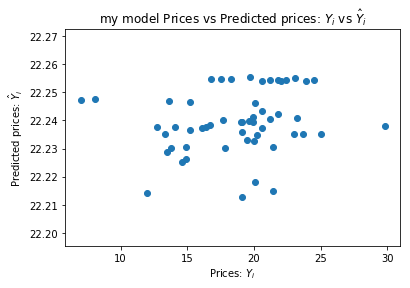

In [141]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
#print("train test split",x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#scale=StandardScaler(with_mean=True)
#x_train=scale.fit_transform(x_train)
#x_test=scale.transform(x_test)



newtheta,cost=data(x_train,y_train)    
print("mymodel cost from the train",cost)
#predict
y_pred=predictcost(x_train,newtheta)
cost=cost1(y_pred,y_train)

y_pred=predictcost(x_test,newtheta)
c=cost1(y_pred,y_test)

#print(y_pred.shape,y_test.shape)
print("my model cost from the test",c)
aa=pd.DataFrame({'type':['mymodel'],'train_cost':[cost],'test_cost':[c],'Coeff':[newtheta]})
#print(aa)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("my model Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()



# Use SGDREGRESSOR model on boston data

(450, 1) (54, 1) (450, 13) (54, 13)
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
coefficient of sgdregressor model [ 22.73990766] [-0.03697114  0.10995223  0.01883134  0.10206679  0.03709152  0.05158118
  0.03142505  0.0571567   0.01386032  0.0279774   0.03979366  0.05169953
  0.00950983]
sklearn Cost from train
-0.000943380226666
shape (450,) (450, 1)
<class 'pandas.core.series.Series'>
train cost : 45.1897757515
test cost 17.2183729505


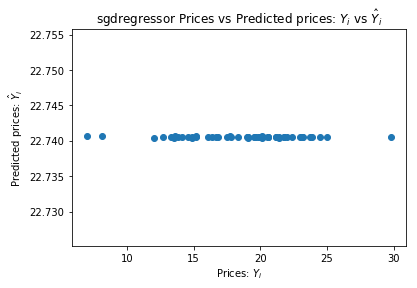

                                               Coeff  test_cost  train_cost  \
0  [-4.30642126306, 4.82291219613, -2.55874326256...  15.282411   45.445280   
0  [-0.0369711351004, 0.109952233902, 0.018831339...  17.218373   45.189776   

           type  
0       mymodel  
0  sgdregressor  


In [142]:
import warnings
warnings.filterwarnings('ignore')

# Use sklearn
import pandas as pd
from sklearn.linear_model import SGDRegressor
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
#print(x_train)
#print(y_train)

print(y_train.shape,y_test.shape,x_train.shape,x_test.shape)
lm = SGDRegressor(fit_intercept=True)
lm.fit(x_train, y_train)
#print(lm.coef_)
print(lm)
#y_test.reshape(-1,1)
#np.reshape(y_test,54)
#print(y_test.shape)
y_pred = lm.predict(x_train)
print('coefficient of sgdregressor model',lm.intercept_,lm.coef_)

#c=cost1(y_pred,y_train)
y_predtrain = lm.predict(x_train)
print("sklearn Cost from train")
print(lm.score(x_train,y_train))

#c1=cost1(y_pred,y_test)
y_predtest = lm.predict(x_test)
print("shape",y_predtrain.shape,y_train.shape)
print(type(cost1(y_predtrain.reshape(450,1),y_train)))
print("train cost :",cost1(y_predtrain.reshape(450,1),y_train)[0])

print("test cost",cost1(y_predtest.reshape(54,1),y_test)[0])
#print(y_predtrain)
#print(y_train)
#print("sklearn Cost from test",lm.score(y_predtest,y_test))
#bb=pd.DataFrame({'type':['sgdregressor'],'train_cost':[lm.score(x_train,y_train)],'test_cost':[lm.score(x_test,y_test)],'Coeff':[lm.coef_]})
bb=pd.DataFrame({'type':['sgdregressor'],'train_cost':[cost1(y_predtrain.reshape(450,1),y_train)[0]],'test_cost':[cost1(y_predtest.reshape(54,1),y_test)[0]],'Coeff':[lm.coef_]})
aa=aa.append(bb)

plt.scatter(y_test, y_predtest)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("sgdregressor Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

print(aa)

# Score comparision of mymodel and SGDregressor


sklearn coeff [ 22.73990766] [-0.03697114  0.10995223  0.01883134  0.10206679  0.03709152  0.05158118
  0.03142505  0.0571567   0.01386032  0.0279774   0.03979366  0.05169953
  0.00950983]
mymodel theta including intercept -4.30642126306 [  4.82291220e+00  -2.55874326e+00  -1.06998034e+01  -6.13320333e-01
   1.74705492e+00  -1.84281057e-03   5.26956375e-01  -5.46160077e-01
  -2.90538283e-01   2.86636557e-01   4.13640841e-01   9.42275633e-01
   2.22545481e+01]


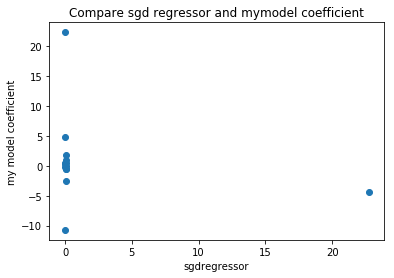

In [143]:
print('sklearn coeff',lm.intercept_,lm.coef_)
print('mymodel theta including intercept',newtheta[0],newtheta[1:])
x1=lm.intercept_.tolist()
x2=lm.coef_.tolist()
x1.extend(x2)
y=newtheta.tolist()
import matplotlib.pyplot as plt
plt.title("Compare sgd regressor and mymodel coefficient")
plt.xlabel("sgdregressor")
plt.ylabel("my model coefficient")
plt.scatter(np.array(x1),np.array(y))
plt.show()

# Observation
1. While trying learning rate of different value sometimes cost is going towards very hogh value, so tried with higher value
2. After trying more iteration cost is going down with a very small alpha value
3. sklearn model is performing better with cost close to 0 but my model cost is close to 30
4. Best cost is achieved by different trial cost function
5. theta are not changing much from initial random value (when alpha like .000005) 
6. when alpha taken like .05 , gradient is becoming too high. cost function is becoming inf, theta are becoming very high
7. sklearn model is always getting global minimum but my model doesnot